In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from importlib import reload

In [11]:
import synthpop as sp
mod2 = sp.SynthPop('macy_defaults.synthpop_conf',
                   output_location='outputfiles/galnuc', name_for_output='nsd_sodc_3dsurot',
                    post_processing_kwargs=[{"name":"ProcessDarkCompactObjects", "remove":True}],
                  maglim=['VISTA_Ks',99,"keep"], chosen_bands=["VISTA_J", "VISTA_H", "VISTA_Ks"])
mod2.init_populations()

Execution Date: 29-10-2024 11:52:18


################################ Settings #################################
# reading default parameters from
default_config_file =  /u/mhuston/code/synthpop/synthpop/config_files/_default.synthpop_conf 
# read configuration from 
config_file = '/u/mhuston/code/synthpop/synthpop/config_files/macy_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
{
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "nsd_sodc_3dsurot",
    "model_name": "Huston2024_NSD",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 2072713504,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "

In [12]:
fields=['ibnorth','ibsouth','central','nsdeast','nsdwest','teast','twest']

In [13]:
dats = {}
for field in fields:
    dats.update({field: pd.read_csv('data/galacticnucleus/'+field+'.csv')})

In [71]:
'''for field in fields:
    fdat = dats[field]
    if field=='central':
        solang=1e-5
    elif field[:3]=='nsd':
        solang=1e-4
    else:
        solang=1e-3
    rad = np.sqrt(solang/np.pi)
    for i,sbf in enumerate(fdict[field]):
        l,b = sbf
        resamp_dat = fdat[(fdat['l']>(l-rad)) & (fdat['l']<(l+rad)) & (fdat['b']>(b-rad)) & (fdat['b']<(b+rad))]
        print(resamp_dat)
        resamp_dat.to_csv('data/galacticnucleus/resamp_'+field+'_'+str(i)+'.csv')'''

              l         b      Jmag      Hmag     Ksmag
2990  -0.075663  0.589837  13.13925  10.83804   9.34176
2995  -0.073885  0.580387  14.03230  13.66724  13.47448
2996  -0.065402  0.575532  14.71870  13.93039  13.77088
2997  -0.066836  0.575368  14.74735  12.67374  11.79673
2998  -0.075425  0.581921  14.84115  12.31004  11.04963
...         ...       ...       ...       ...       ...
90240 -0.076495  0.568395  99.00000  99.00000  17.16583
90243 -0.083788  0.557390  99.00000  99.00000  17.16603
90245 -0.078347  0.554450  99.00000  99.00000  17.10283
90284 -0.091098  0.556360  99.00000  99.00000  17.46913
90297 -0.083638  0.559368  99.00000  99.00000  17.59043

[4869 rows x 5 columns]
              l         b      Jmag      Hmag     Ksmag
2079  -0.076412  0.606367  14.89534  12.57129  11.43741
2081  -0.070470  0.606665  15.26584  12.96084  11.86231
2083  -0.072793  0.606499  15.88409  13.56699  12.54091
2087  -0.072207  0.606737  16.49604  14.39124  13.38881
2091  -0.074063  0.6064

In [16]:
maxs = []
mins = []
for field in fields:
    dat = dats[field]
    maxs.append([max(dat['l']),max(dat['b'])])    
    mins.append([min(dat['l']),min(dat['b'])])

In [17]:
l_len, b_len = 7.95/60, 3.43/60
arrs = [[1,2],[1,2],[5,5],[3,3],[2,4],[1,2],[1,2]]
tru = [[1,1],[1,1],np.ones(arrs[2][0]*arrs[2][1]),[0,1,1,1,1,0,1,1,0],  [0,1,0,1,1,1,1,0],[1,1],[1,1]]
fdict = {}

cens = [[],[]]
fs = []
for i,field in enumerate(fields):
    fdict.update({field:[]})
    n = 0
    for j in range(arrs[i][0]):
        for k in range(arrs[i][1]):
            if tru[i][n]==1:
                cens[0].append(mins[i][0] + 0.5*l_len + 0.9*l_len*j)
                cens[1].append(mins[i][1] + 0.5*b_len + 0.9*b_len*k)
                if field=='nsdeast' and j==0:
                    cens[1][-1]-=0.01
                fdict[field].append([cens[0][-1],cens[1][-1]])
                fs.append(field)
            n+=1

In [146]:
l_len*b_len, np.pi*0.01**2

(0.007574583333333334, 0.0003141592653589793)

ibnorth 90300
ibsouth 159607
central 2009522
nsdeast 488197
nsdwest 199481
teast 162830
twest 167985


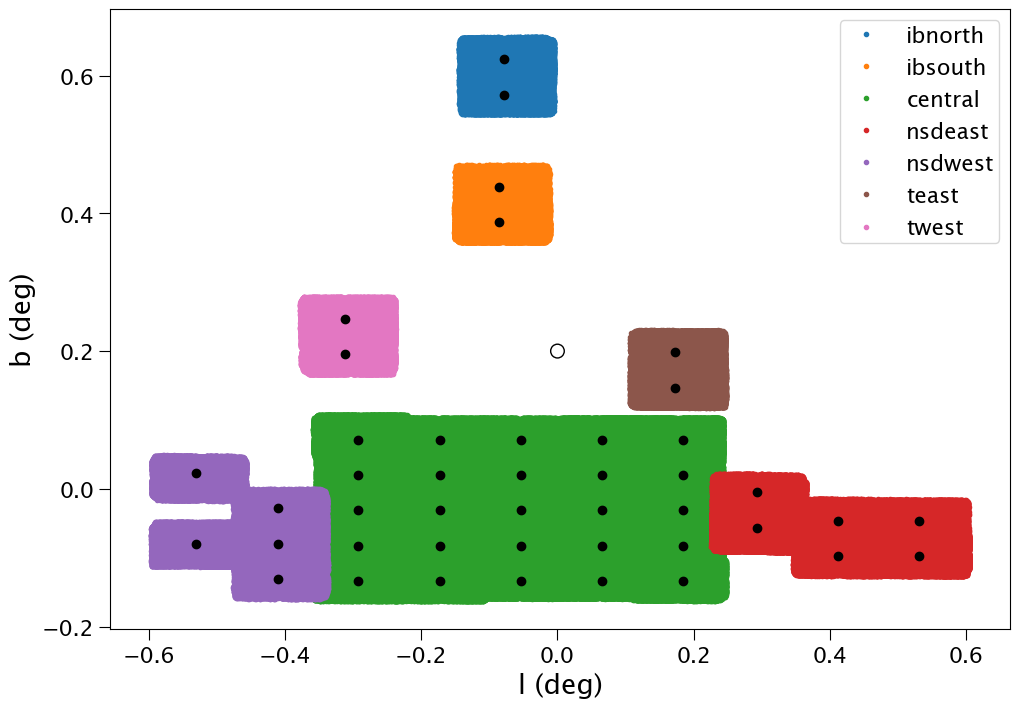

In [72]:
plt.figure(figsize=(12,8))
for field in fields:
    dat = dats[field]
    print(field,len(dat))
    plt.plot(dat['l'],dat['b'], '.',label=field)

plt.plot(cens[0],cens[1],'ko')
circ = plt.Circle((0,0.2),radius=0.01,fill=False)
plt.gca().add_patch(circ)
plt.xlabel('l (deg)'); plt.ylabel('b (deg)')

plt.legend()
#plt.plot(l_len/2*np.array([-1,1,1,-1,-1]),b_len/2*np.array([-1,-1,1,1,-1]))

In [24]:
max(coords.l.degree)

359.98870246867614

[359.9185851471552, 0.4141768637604363] 0.015680764088630183


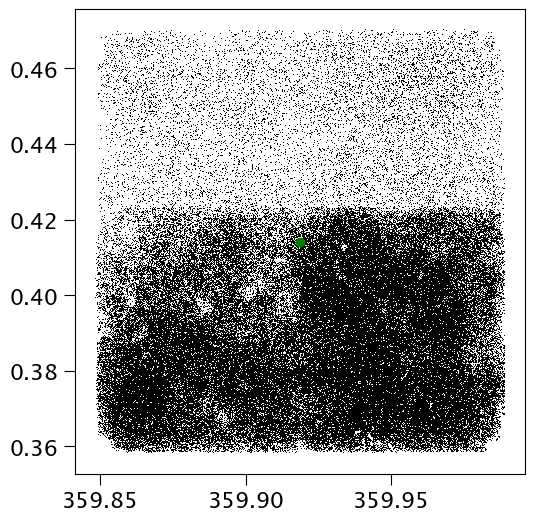

In [25]:
plt.plot(coords.l.degree,coords.b.degree, 'k,')
l_leng,b_leng = max(coords.l.degree)-min(coords.l.degree), max(coords.b.degree)-min(coords.b.degree)
area = l_leng*b_leng * np.cos(b_leng*np.pi/180)
center = [max(coords.l.degree)-l_leng/2,max(coords.b.degree)-b_leng/2]
plt.plot(*center,'go')
print(center, area)

In [20]:
for field in fields:
    if field=='central':
        solang=1e-5
    elif field[:3]=='nsd':
        solang=1e-4
    else:
        solang=1e-3
    for sbf in fdict[field]:
        l,b = sbf
        mod2.process_location(l,b,solang)



############################# update location #############################
# set location to: 
l, b = (-0.08 deg, 0.57 deg)
# set solid_angle to:
solid_angle = 1.000e-03 deg^2


############################# Generate Field ##############################


# Population 0;  bulge ----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 584324.2411
expected_total_eMass = 318345.1409
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5448
n_expected_stars = 1018224.2698
# Determine velocities when position are generated 


 899254 / 899254


# From Generated Field:
generated_stars = 1018088
generated_total_iMass = 586037.2963
generated_total_eMass = 319225.5647
det_mass_loss_corr = 0.5447
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 565.0543
expected_total_eMass = 297.8754
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 984.6451
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 956
generated_total_iMass = 520.2790
generated_total_eMass = 293.4708
det_mass_loss_corr = 0.5641
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 119126.8394
expected_total_eMass = 64832.6352
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 207586.5257
# Determine velocities when position are generated 


 184341 / 184341


# From Generated Field:
generated_stars = 208530
generated_total_iMass = 119368.6850
generated_total_eMass = 65410.2072
det_mass_loss_corr = 0.5480
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5526.4793
expected_total_eMass = 2911.4615
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 9630.2617
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 9497
generated_total_iMass = 5331.8783
generated_total_eMass = 2866.9054
det_mass_loss_corr = 0.5377
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 1249.1524
expected_total_eMass = 1010.1691
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 2176.7319
# Determine velocities when position are generated 
# From Generated Field:
generated_stars =

 881027 / 881027


# From Generated Field:
generated_stars = 996097
generated_total_iMass = 570025.9207
generated_total_eMass = 312383.0255
det_mass_loss_corr = 0.5480
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 563.9104
expected_total_eMass = 297.2724
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 982.6518
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1026
generated_total_iMass = 480.8762
generated_total_eMass = 298.9141
det_mass_loss_corr = 0.6216
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 87624.9809
expected_total_eMass = 47688.3165
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 152692.4196
# Determine velocities when position are generated 


 135150 / 135150


# From Generated Field:
generated_stars = 152694
generated_total_iMass = 87583.2032
generated_total_eMass = 47908.3000
det_mass_loss_corr = 0.5470
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5461.7397
expected_total_eMass = 2877.3553
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 9517.4485
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 9462
generated_total_iMass = 5547.7861
generated_total_eMass = 2853.9745
det_mass_loss_corr = 0.5144
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 1086.7429
expected_total_eMass = 878.8313
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1893.7226
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1

 973490 / 973490


# From Generated Field:
generated_stars = 1101339
generated_total_iMass = 632970.1087
generated_total_eMass = 345483.7145
det_mass_loss_corr = 0.5458
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 567.9713
expected_total_eMass = 299.4131
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 989.7281
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 984
generated_total_iMass = 486.2594
generated_total_eMass = 288.5391
det_mass_loss_corr = 0.5934
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 359824.1068
expected_total_eMass = 195827.7846
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 627017.6944
# Determine velocities when position are generated 


 554142 / 554142


# From Generated Field:
generated_stars = 627373
generated_total_iMass = 359019.7800
generated_total_eMass = 196630.5104
det_mass_loss_corr = 0.5477
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5755.4992
expected_total_eMass = 3032.1138
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 10029.3442
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 9910
generated_total_iMass = 5725.9846
generated_total_eMass = 2992.6844
det_mass_loss_corr = 0.5226
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 2225.6057
expected_total_eMass = 1799.8110
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 3878.2676
# Determine velocities when position are generated 
# From Generated Field:
generated_stars

 951516 / 951516


# From Generated Field:
generated_stars = 1076999
generated_total_iMass = 617954.4505
generated_total_eMass = 337821.5746
det_mass_loss_corr = 0.5467
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 567.3025
expected_total_eMass = 299.0606
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 988.5627
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 984
generated_total_iMass = 595.3850
generated_total_eMass = 299.0023
det_mass_loss_corr = 0.5022
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 265277.1945
expected_total_eMass = 144372.3317
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 462263.3439
# Determine velocities when position are generated 


 408678 / 408678


# From Generated Field:
generated_stars = 462539
generated_total_iMass = 261783.1675
generated_total_eMass = 144854.6428
det_mass_loss_corr = 0.5533
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5692.8445
expected_total_eMass = 2999.1060
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 9920.1643
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 10067
generated_total_iMass = 6032.0816
generated_total_eMass = 3029.9673
det_mass_loss_corr = 0.5023
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 1854.4010
expected_total_eMass = 1499.6238
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 3231.4183
# Determine velocities when position are generated 
# From Generated Field:
generated_stars

 204454 / 204454


# From Generated Field:
generated_stars = 231426
generated_total_iMass = 133321.5422
generated_total_eMass = 72643.1129
det_mass_loss_corr = 0.5449
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 598.9527
expected_total_eMass = 315.5404
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1043.7154
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1014
generated_total_iMass = 545.4752
generated_total_eMass = 303.5370
det_mass_loss_corr = 0.5565
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 597.5928
expected_total_eMass = 483.2635
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1041.3456
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1016


 214732 / 214732


# From Generated Field:
generated_stars = 242971
generated_total_iMass = 138013.0135
generated_total_eMass = 76066.5416
det_mass_loss_corr = 0.5512
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 605.9424
expected_total_eMass = 319.2227
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1055.8953
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1051
generated_total_iMass = 651.2146
generated_total_eMass = 319.9325
det_mass_loss_corr = 0.4913
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 709.7009
expected_total_eMass = 573.9235
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1236.7015
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1206


 168414 / 168414


# From Generated Field:
generated_stars = 190457
generated_total_iMass = 110395.4259
generated_total_eMass = 59802.4241
det_mass_loss_corr = 0.5417
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 593.0620
expected_total_eMass = 312.4371
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1033.4504
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1019
generated_total_iMass = 544.7215
generated_total_eMass = 302.8771
det_mass_loss_corr = 0.5560
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 488.1524
expected_total_eMass = 394.7608
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 850.6383
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 843
ge

 186085 / 186085


# From Generated Field:
generated_stars = 210552
generated_total_iMass = 119262.3475
generated_total_eMass = 66008.1744
det_mass_loss_corr = 0.5535
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 600.2561
expected_total_eMass = 316.2271
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1045.9866
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1044
generated_total_iMass = 525.2913
generated_total_eMass = 313.3042
det_mass_loss_corr = 0.5964
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 621.9829
expected_total_eMass = 502.9874
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1083.8470
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1093


 150063 / 150063


# From Generated Field:
generated_stars = 169909
generated_total_iMass = 96773.8005
generated_total_eMass = 53409.3507
det_mass_loss_corr = 0.5519
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 592.9530
expected_total_eMass = 312.3797
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1033.2605
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1073
generated_total_iMass = 721.3035
generated_total_eMass = 325.8238
det_mass_loss_corr = 0.4517
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 487.7356
expected_total_eMass = 394.4238
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 849.9121
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 824
gen

 165998 / 165998


# From Generated Field:
generated_stars = 187768
generated_total_iMass = 108410.5045
generated_total_eMass = 58782.2855
det_mass_loss_corr = 0.5422
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 600.1489
expected_total_eMass = 316.1706
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1045.7999
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1062
generated_total_iMass = 661.8082
generated_total_eMass = 322.2966
det_mass_loss_corr = 0.4870
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 621.4103
expected_total_eMass = 502.5243
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1082.8491
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1090


 158244 / 158244


# From Generated Field:
generated_stars = 179181
generated_total_iMass = 101668.0731
generated_total_eMass = 56215.2720
det_mass_loss_corr = 0.5529
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 596.1604
expected_total_eMass = 314.0694
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1038.8495
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1069
generated_total_iMass = 567.3995
generated_total_eMass = 322.8306
det_mass_loss_corr = 0.5690
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 540.2715
expected_total_eMass = 436.9088
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 941.4595
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 907
ge

 169331 / 169331


# From Generated Field:
generated_stars = 191725
generated_total_iMass = 110894.5300
generated_total_eMass = 59968.7928
det_mass_loss_corr = 0.5408
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 609.7299
expected_total_eMass = 321.2181
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1062.4953
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1071
generated_total_iMass = 575.0112
generated_total_eMass = 321.7895
det_mass_loss_corr = 0.5596
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 750.9713
expected_total_eMass = 607.2982
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1308.6180
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1383


 153688 / 153688


# From Generated Field:
generated_stars = 173827
generated_total_iMass = 99155.0335
generated_total_eMass = 54334.5049
det_mass_loss_corr = 0.5480
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 588.8961
expected_total_eMass = 310.2424
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1026.1911
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1040
generated_total_iMass = 616.1263
generated_total_eMass = 316.7228
det_mass_loss_corr = 0.5141
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 405.9734
expected_total_eMass = 328.3041
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 707.4360
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 775
gen

 176269 / 176269


# From Generated Field:
generated_stars = 199465
generated_total_iMass = 114792.7970
generated_total_eMass = 62721.4374
det_mass_loss_corr = 0.5464
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 596.1133
expected_total_eMass = 314.0446
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1038.7675
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1055
generated_total_iMass = 627.5073
generated_total_eMass = 316.4715
det_mass_loss_corr = 0.5043
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 539.7488
expected_total_eMass = 436.4860
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 940.5486
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 982
ge

 190460 / 190460


# From Generated Field:
generated_stars = 215239
generated_total_iMass = 125703.7670
generated_total_eMass = 67465.4689
det_mass_loss_corr = 0.5367
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 603.2716
expected_total_eMass = 317.8157
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 1051.2414
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1088
generated_total_iMass = 522.6381
generated_total_eMass = 321.7239
det_mass_loss_corr = 0.6156
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 668.6552
expected_total_eMass = 540.7305
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 1165.1766
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1108


 1041502 / 1041502


# From Generated Field:
generated_stars = 1178412
generated_total_iMass = 674130.9927
generated_total_eMass = 370023.5888
det_mass_loss_corr = 0.5489
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 569.8245
expected_total_eMass = 300.3901
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 992.9574
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1011
generated_total_iMass = 483.3977
generated_total_eMass = 300.7686
det_mass_loss_corr = 0.6222
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 1183580.6905
expected_total_eMass = 644142.4578
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 2062468.9164
# Determine velocities when position are generated 


 1820418 / 1820418


# From Generated Field:
generated_stars = 2060345
generated_total_iMass = 1182063.2541
generated_total_eMass = 646115.4998
det_mass_loss_corr = 0.5466
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 6023.5319
expected_total_eMass = 3173.3189
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 10496.4093
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 10377
generated_total_iMass = 6256.9930
generated_total_eMass = 3138.3236
det_mass_loss_corr = 0.5016
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 6256.5247
expected_total_eMass = 5059.5493
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 10902.4149
# Determine velocities when position are generated 
# From Generated Field:
generated_s

 1022509 / 1022509


# From Generated Field:
generated_stars = 1157183
generated_total_iMass = 664454.2022
generated_total_eMass = 362478.7462
det_mass_loss_corr = 0.5455
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 569.6177
expected_total_eMass = 300.2811
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 992.5972
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1030
generated_total_iMass = 556.7545
generated_total_eMass = 318.6319
det_mass_loss_corr = 0.5723
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 952770.3338
expected_total_eMass = 518528.0813
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 1660266.3542
# Determine velocities when position are generated 


 1467446 / 1467446


# From Generated Field:
generated_stars = 1661104
generated_total_iMass = 951182.4094
generated_total_eMass = 520725.2055
det_mass_loss_corr = 0.5475
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5970.7180
expected_total_eMass = 3145.4954
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 10404.3775
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 10499
generated_total_iMass = 5861.1241
generated_total_eMass = 3163.8553
det_mass_loss_corr = 0.5398
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5083.3808
expected_total_eMass = 4110.8470
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 8858.1327
# Determine velocities when position are generated 
# From Generated Field:
generated_sta

 1017561 / 1017561


# From Generated Field:
generated_stars = 1151405
generated_total_iMass = 663197.4175
generated_total_eMass = 360828.8850
det_mass_loss_corr = 0.5441
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 569.0253
expected_total_eMass = 299.9688
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 991.5648
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1047
generated_total_iMass = 579.9632
generated_total_eMass = 322.3672
det_mass_loss_corr = 0.5558
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 861161.0684
expected_total_eMass = 468671.3898
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 1500631.0511
# Determine velocities when position are generated 


 1325471 / 1325471


# From Generated Field:
generated_stars = 1500818
generated_total_iMass = 861340.3513
generated_total_eMass = 470669.1741
det_mass_loss_corr = 0.5464
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5975.9961
expected_total_eMass = 3148.2760
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 10413.5749
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 10522
generated_total_iMass = 5931.8804
generated_total_eMass = 3195.0569
det_mass_loss_corr = 0.5386
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5187.8535
expected_total_eMass = 4195.3324
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 9040.1835
# Determine velocities when position are generated 
# From Generated Field:
generated_sta

 1006722 / 1006722


# From Generated Field:
generated_stars = 1139800
generated_total_iMass = 652089.7404
generated_total_eMass = 357249.4849
det_mass_loss_corr = 0.5479
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 568.6217
expected_total_eMass = 299.7560
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5272
n_expected_stars = 990.8615
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 956
generated_total_iMass = 716.3764
generated_total_eMass = 297.3205
det_mass_loss_corr = 0.4150
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 682573.3848
expected_total_eMass = 371478.2618
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5442
n_expected_stars = 1189430.0072
# Determine velocities when position are generated 


 1051082 / 1051082


# From Generated Field:
generated_stars = 1188939
generated_total_iMass = 676067.9145
generated_total_eMass = 372941.8183
det_mass_loss_corr = 0.5516
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5919.7578
expected_total_eMass = 3118.6485
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5268
n_expected_stars = 10315.5758
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 10452
generated_total_iMass = 6140.8629
generated_total_eMass = 3163.3379
det_mass_loss_corr = 0.5151
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 4101.9907
expected_total_eMass = 3317.2129
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8087
n_expected_stars = 7147.9946
# Determine velocities when position are generated 
# From Generated Field:
generated_sta

In [26]:
'''mdat,_=mod2.process_location(center[0]-360,center[1],1e-3)
print(len(mdat))'''



############################# update location #############################
# set location to: 
l, b = (-0.08 deg, 0.41 deg)
# set solid_angle to:
solid_angle = 1.000e-03 deg^2


############################# Generate Field ##############################


# Population 0;  bulge ----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 619162.3440
expected_total_eMass = 339791.6830
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5488
n_expected_stars = 1078932.0061
# Determine velocities when position are generated 


 955066 / 955066


# From Generated Field:
generated_stars = 1079993
generated_total_iMass = 619240.1025
generated_total_eMass = 339150.1659
det_mass_loss_corr = 0.5477
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 568.3765
expected_total_eMass = 299.2076
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5264
n_expected_stars = 990.4343
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 979
generated_total_iMass = 638.7726
generated_total_eMass = 300.9844
det_mass_loss_corr = 0.4712
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 306465.4052
expected_total_eMass = 166843.2679
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5444
n_expected_stars = 534036.5700
# Determine velocities when position are generated 


 471451 / 471451


# From Generated Field:
generated_stars = 533486
generated_total_iMass = 306398.3372
generated_total_eMass = 167630.9589
det_mass_loss_corr = 0.5471
# Done


# Population 3;  thick_disk -----------------------------------------------
# From density profile (number density)
expected_total_iMass = 5735.7191
expected_total_eMass = 3014.6624
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5256
n_expected_stars = 9994.8760
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 9935
generated_total_iMass = 5601.8408
generated_total_eMass = 3023.7360
det_mass_loss_corr = 0.5398
# Done


# Population 4;  thin_disk_1 ----------------------------------------------
# From density profile (number density)
expected_total_iMass = 1996.2698
expected_total_eMass = 1629.0003
average_iMass_per_star = 0.5739
mass_loss_correction = 0.8160
n_expected_stars = 3478.6342
# Determine velocities when position are generated 
# From Generated Field:
generated_stars 

1669914


In [155]:
for field in fields:
    do = np.where([f==field for f in fs])[0]
    print(field,do)

ibnorth [0 1]
ibsouth [2 3]
central [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28]
nsdeast [29 30 31 32 33 34]
nsdwest [35 36 37 38 39]
teast [40 41]
twest [42 43]


Text(0.5, 0, 'J-H')

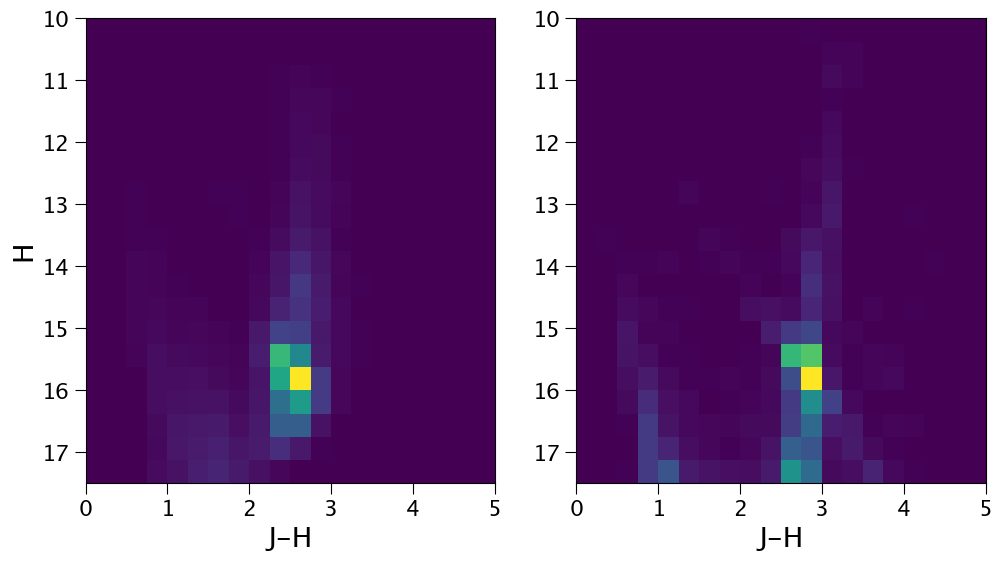

In [53]:
plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
plt.hist2d(dat['Jmag']-dat['Hmag'],dat['Hmag'],range=[[0,5],[10,17.5]],bins=20,cmap='viridis')
plt.xlim(0,5);plt.ylim(17.5,10)
plt.xlabel('J-H')
plt.ylabel('H')
plt.subplot(122)
plt.hist2d(mdat['VISTA_J']-mdat['VISTA_H'],mdat['VISTA_H'],range=[[0,5],[10,17.5]],bins=20,cmap='viridis')
plt.xlim(0,5)
plt.ylim(17.5,10)
plt.xlabel('J-H')
#plt.plot(dat['Hmag']-dat['Ksmag'],dat['Ksmag'], 'k,')
#plt.xlim(-0.25,3.75);plt.ylim(19,10)

Text(0.5, 0, 'H-Ks')

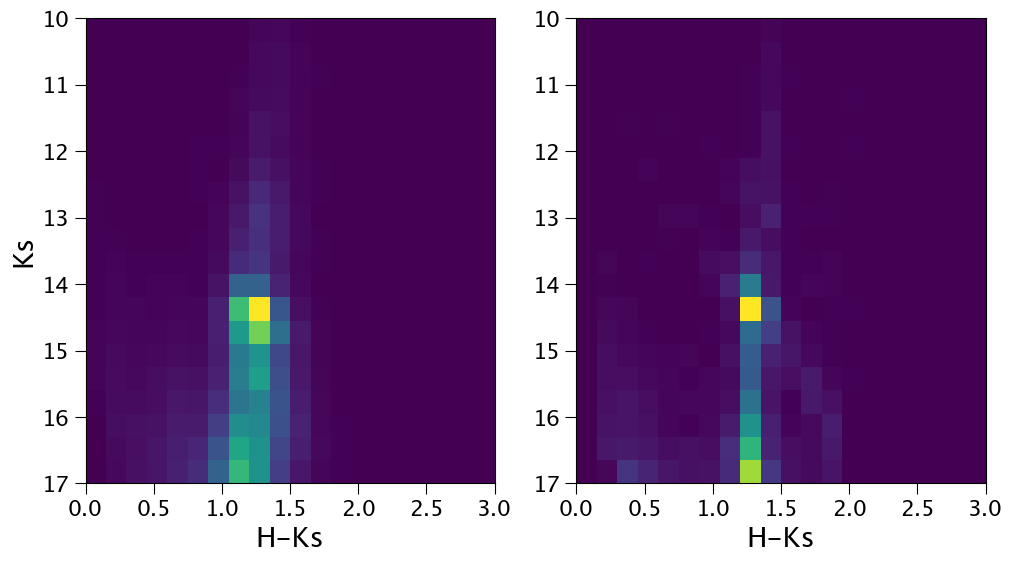

In [55]:
plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
plt.hist2d(dat['Hmag']-dat['Ksmag'],dat['Ksmag'],range=[[0,3],[10,17]],bins=20,cmap='viridis')
plt.ylim(17,10)
plt.xlabel('H-Ks')
plt.ylabel('Ks')
plt.subplot(122)
plt.hist2d(mdat['VISTA_H']-mdat['VISTA_Ks'],mdat['VISTA_Ks'],range=[[0,3],[10,17]],bins=20,cmap='viridis')
plt.ylim(17,10)
plt.xlabel('H-Ks')
#plt.plot(dat['Hmag']-dat['Ksmag'],dat['Ksmag'], 'k,')
#plt.xlim(-0.25,3.75);plt.ylim(19,10)

In [ ]:
fields_sim = {}
fields_re = {}
for field in fields:
    sbfs = fdict[field]
    for i,sbf in enumerate(sbfs):
        l,b=sbf
        new_sdat = pd.read_csv('outputfiles/galnuc/nsd_sodc_3dsurot_l'+f'{l:2.3f}'+'_b'+f'{b:2.3f}'+'.csv',usecols=['VISTA_J','VISTA_H','VISTA_Ks'])
        new_rdat = pd.read_csv('data/galacticnucleus/resamp_'+field+'_'+str(i)+'.csv')
        if i==0:
            sdat = new_sdat
            rdat = new_rdat
        else:
            sdat = pd.concat([sdat, new_sdat])
            rdat = pd.concat([rdat, new_rdat])
    fields_sim.update({field:sdat[sdat['VISTA_J']<99]})
    fields_re.update({field:rdat})
    print(field)

In [ ]:
binwidth=0.25
bins = {'J':np.arange(13,18.001,binwidth),'H':np.arange(11,18.001,binwidth),'Ks':np.arange(10,16.001,binwidth)}
filts = ['J','H','Ks']
field='ibnorth'
for field in fields:
    if field=='central':
        solang=1e-5
    elif field[:3]=='nsd':
        solang=1e-4
    else:
        solang=1e-3
    
    plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    plt.subplot(131)
    plt.title(field)
    for i,filt in enumerate(filts):
        plt.subplot(131+i)
        hist,_ = np.histogram(rdat[filt+'mag'],bins=bins[filt])
        mhist,_ = np.histogram(sdat['VISTA_'+filt],bins=bins[filt])
        plt.step(bins[filt][1:],hist/(solang*len(fdict[field])),label='data')
        plt.step(bins[filt][1:],mhist/(solang*len(fdict[field])),label='sim')
        plt.xlabel(filt)
        plt.ylabel('N stars')
        plt.yscale('log')
        plt.legend()
    plt.tight_layout()
    plt.savefig('figures/v2_galnuc_lumfunc_'+field+'.png')